# <center> Итоговая работа Python-13
# <center> Визуализация

In [44]:
# Импортируем все необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

# считываем файл с данными
churn_data = pd.read_csv('churn.csv', sep=',')

# просматриваем исходные данный, имеющиеся для визуализации и анализа
display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### <center> ЗАДАНИЕ 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

Text(0.5, 1.0, 'Соотношение лояльных и ушедших клиентов')

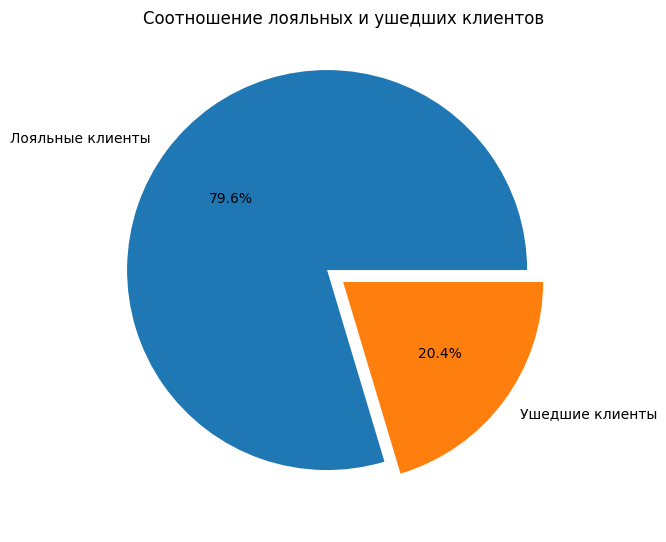

In [18]:
churn_data1=churn_data.copy() #создаем копию данных, чтобы не повредить исходные данные совершая обработку данных 
pie_data_1=churn_data1['Exited'].value_counts() #Определяем количество клиентов банка по статусу лояльности

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    pie_data_1,
    labels=["Лояльные клиенты", "Ушедшие клиенты"],
    autopct='%.1f%%',
    explode = [0.1, 0]);
axes.set_title('Соотношение лояльных и ушедших клиентов')


Из графика видно, что ушедшие клиенты составляют пятую часть всех клиентов, на мой взгляд это очень много и банку следует позаботиться о мерах по сокращению оттока клиентов как можно раньше. Жаль, что нет данных о новых клиентах банка, поступивших за рассмотриваемый период, они бы позволили оценить на сколько критическим для банка станет сохранение подобной тенденции оттока  клиентов в будущем.

### <center> ЗАДАНИЕ 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [15]:
box_data_2=churn_data1[churn_data1["Balance"] > 2500]
fig=px.box(data_frame=box_data_2,
           x='Balance',
           title="Распределение клиентов")

fig.show()

Из графика видно, что основная часть клиентов имеют на счетах суммы от 100,2 до 139,5 тыс. долларов. При этом минимальный балланс составляет 3,8 тыс. долларов, а максимальный - 250,9 тыс долларов.  
Вывод: Положение медианы и усов диаграммы говорит о симетричном распределении баланса клиентов. Само по себе это знание не показывает связь с оттоком клиентов, а значит нужно исследовать данные дальше.

### <center> ЗАДАНИЕ 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [43]:
churn_data2=churn_data.copy() # создадим копию, чтобы не вносить изменения в исходные данные
churn_data2['Exited']=churn_data2['Exited'].astype(str)
churn_data2.loc[churn_data2['Exited'] == '0', 'Exited'] = 'Лояльные клиенты'
churn_data2.loc[churn_data2['Exited'] == '1', 'Exited'] = 'Ушедшие клиенты'
box_data_3=churn_data2.groupby('Balance', as_index=False)['Exited'].value_counts()
fig=px.box(data_frame=box_data_3,
           x='Balance',
           y='Exited',
           title="Распределение распредление балланса клиентов с учетом статуса лояльности")

fig.show()


***Описание графика и выводы делаются на основании предположения, что "ушедшие клиенты", это клиенты, которые пользовались различными продуктами банка, и получили статус "ушедшие" после отказа от услуг банка всех кроме депозитных счетов.***

Из графика видно, что многие ушедшие клиенты продолжают хранить деньги в данном банке, а значит доверяют ему. Так, например, максимальная сумма на счете составила  250,9 тыс. долларов, и принадлежит именно ушедшему клиенту. Данный показатель сообщает, что банку следует позаботиться о привлекательности других предлагаемых продуктов, а тот факт, что клиенты продолжают хранить деньги в этом банке может свидетельствовать о высокой вероятности возвращения ушедших клиентов. Так как у ушедших клиентов с положительным балансом имеется доверие к самому банку, то на возвращение их потребуется меньше усилий, чем на привлечение такого же количества новых клиентов.

### <center> ЗАДАНИЕ 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?